In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("weight-height.csv")

In [77]:
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns)

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

Shape: (10000, 3)

Columns: Index(['Gender', 'Height', 'Weight'], dtype='object')


In [78]:
low_h, high_h = df['Height'].quantile([0.01, 0.99])
low_w, high_w = df['Weight'].quantile([0.01, 0.99])

In [79]:
print("\nHeight Range after cutoff:", low_h, "-", high_h)
print("Weight Range after cutoff:", low_w, "-", high_w)


Height Range after cutoff: 58.13441158671655 - 74.7857900583366
Weight Range after cutoff: 97.03287365980914 - 227.43736983602577


In [80]:
df_clean = df[
    (df['Height'].between(low_h, high_h)) &
    (df['Weight'].between(low_w, high_w))
]

print("\nShape after outlier removal:", df_clean.shape)


Shape after outlier removal: (9710, 3)


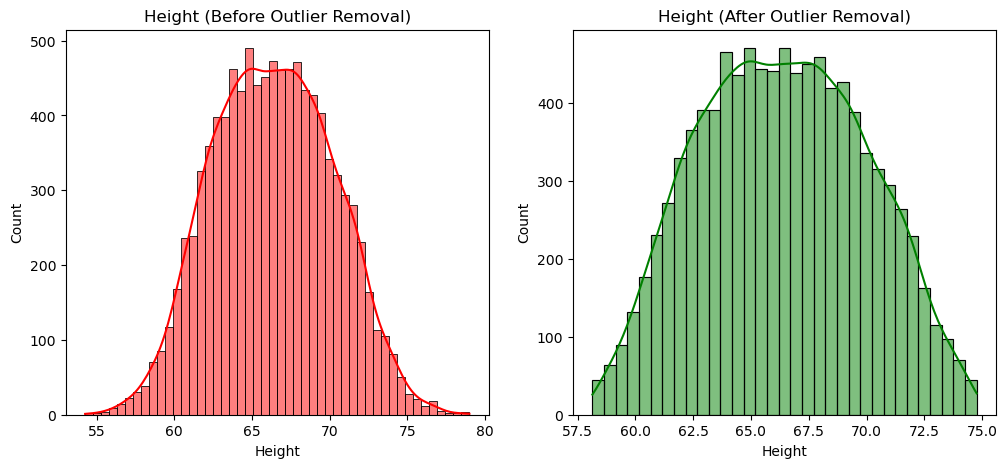

In [81]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Height'], kde=True, color="red")
plt.title("Height (Before Outlier Removal)")

plt.subplot(1,2,2)
sns.histplot(df_clean['Height'], kde=True, color="green")
plt.title("Height (After Outlier Removal)")

plt.show()

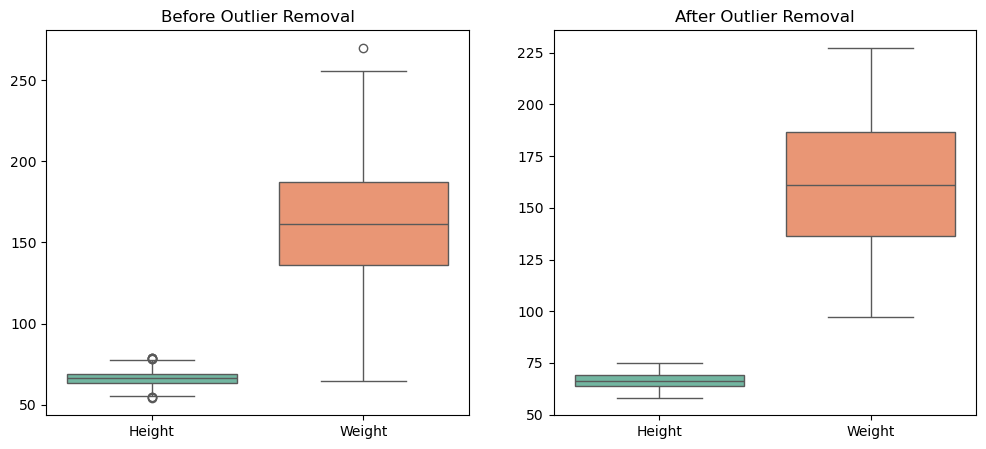

In [82]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df[['Height','Weight']], palette="Set2")
plt.title("Before Outlier Removal")

plt.subplot(1,2,2)
sns.boxplot(data=df_clean[['Height','Weight']], palette="Set2")
plt.title("After Outlier Removal")

plt.show()

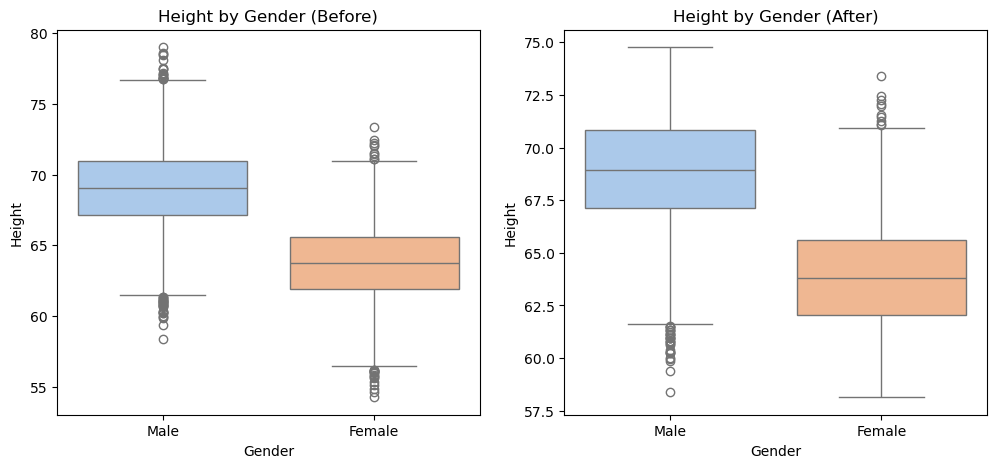

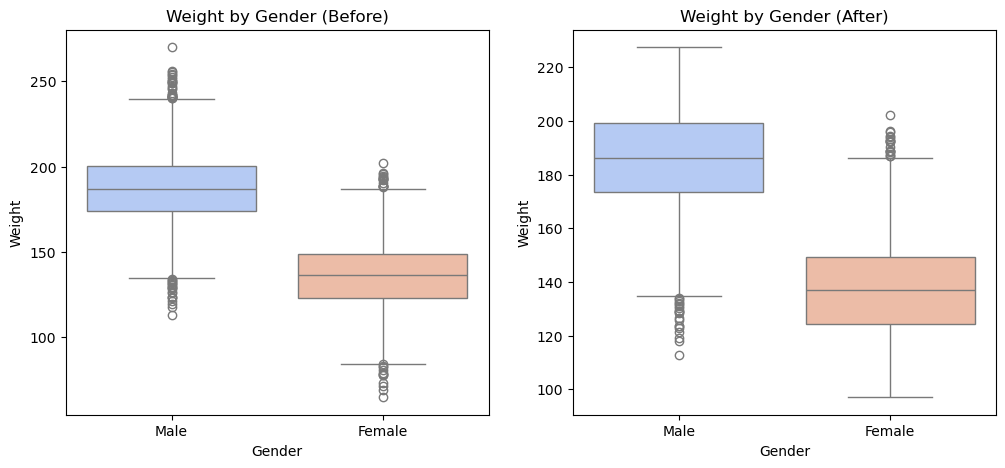

In [85]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="Gender", y="Height", data=df,
            hue="Gender", palette="pastel", legend=False)
plt.title("Height by Gender (Before)")

plt.subplot(1,2,2)
sns.boxplot(x="Gender", y="Height", data=df_clean,
            hue="Gender", palette="pastel", legend=False)
plt.title("Height by Gender (After)")

plt.show()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="Gender", y="Weight", data=df,
            hue="Gender", palette="coolwarm", legend=False)
plt.title("Weight by Gender (Before)")

plt.subplot(1,2,2)
sns.boxplot(x="Gender", y="Weight", data=df_clean,
            hue="Gender", palette="coolwarm", legend=False)
plt.title("Weight by Gender (After)")

plt.show()


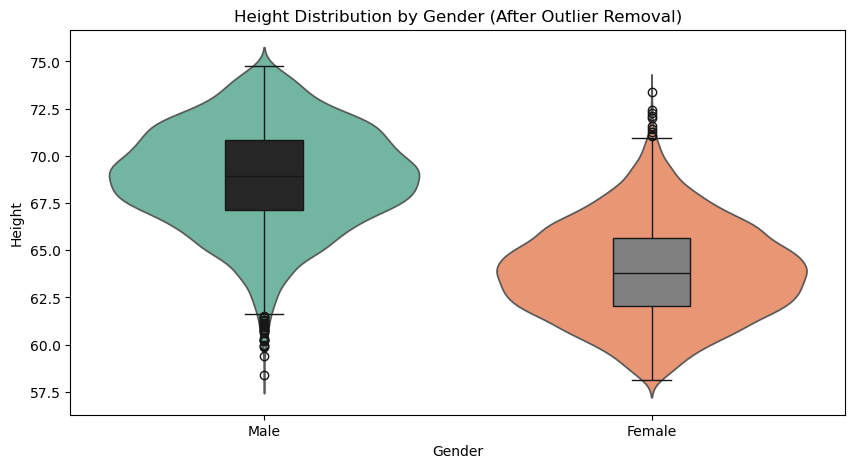

In [84]:
plt.figure(figsize=(10,5))

sns.violinplot(x="Gender", y="Height", data=df_clean, hue="Gender",
               palette="Set2", inner=None, legend=False)
sns.boxplot(x="Gender", y="Height", data=df_clean, hue="Gender",
            palette="dark:grey", legend=False, width=0.2, showcaps=True,
            boxprops={'zorder':2})

plt.title("Height Distribution by Gender (After Outlier Removal)")
plt.show()